Training Generative Adversarial Networks with Limited Data 논문

references: https://arxiv.org/abs/2006.06676

GANs에서 Data의 양이 적을 경우, Ovefitting이나 training divergence이 발생하지 않도록 보완한 논문이다. 

**1.Introduction**

GANs 모델과 같은 머신러닝 모델을 학습시키기 위해서는 막대한 양의 data가 필요하지만, 이러한 dataset을 수집, 가공하기란 쉽지 않다. 그래서 적은 dataset에서도 학습이 가능한 방법을 고안하였다.

Dataset이 적을 경우의 가장 큰 문제점은 Discriminator가 training dataset에 overfit해서 Generator에 주는 feedback이 무의미해지거나 training 시 diverge된다는 점이다.

이를 해결하기 위해서 대부분의 deep learning 모델에서는 dataset augmentation(data를 crop, rotaion 등을 통해 조금 변형시켜 data 수를 늘리는법)이 가장 널리 쓰이고 있다. 하지만, GAN의 경우, 비슷한 형태의 dataset을 사용할 경우, Augmented distribution 이슈를 만들게된다(generator의 leaking augmentation). 예를 들면, noise를 통해 data를 변형할 경우, 실제 dataset에는 noise가 없지만, noise가 있는 결과물이 생성될 수도 있다.

이 논문은 Discriminator에서 overfitting이 발생하지 않고 Generator의 leaking도 없는 광범위하게 사용될 수 있는 augmentation 방법을 연구한 것이다. training setup이나 dataset의 특성, 양 등에 구애받지 않고 사용될 수 있는 adaptive control scheme을 소개한다.

겨우 수천장의 이미지 dataset에서도 좋은 결과를 낼 수 있었고, 기존의 StyleGAN2의 FID=5.59이지만 이 방법을 사용하면 FID=2.42까지 낮출 수 있다. (FID는 Generate한 이미지와 원본 이미지가 얼마나 유사한지를 수치적으로 나타낸 방법이다.)



**2.Overfitting in GANs**

먼저 data의 양이 GAN 모델의 training에 어떠한 영향을 미치는지 연구하였다. dataset으로는 FFHQ dataset을 이용하였고, GAN 모델은 StyleGAN2을 사용하였고, dataset을 random화 시키고, FFHQ dataset을 256x256으로 downscaling하였다. 

아래 그림을 보면, (a)의 경우, FID가 감소하다가 다시 증가하는 것을 볼 수 있고, Dataset의 양이 적을 수록 빠르게 이러한 현상이 나타난 것을 볼 수 있다. 

(b)와 (c)는 Disciriminator가 시간이 지날 수록 더욱 fake와 real 이미지를 잘 구별해 나가는 것을 볼 수 있다. 또한, Best FID(FID가 악회되는 지점)을 보면, real과 fake 결과 차이가 큰 지점과 일치하는 것을 볼 수 있다. 이 지점을 overfitting이 발생하는 지점으로 보고, 이 논문에서는 이를 줄이는 augmentation 방법을 찾았다. 

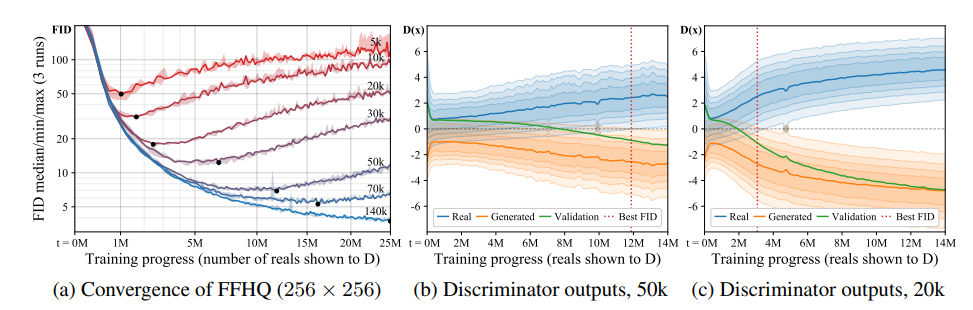

2.1 Stochatic discriminator augmentation

Zhao et. al.은 balanced Consistency Regularization(bCR)라는 방법을 제시하였다. 이 방법은 Consistency Regularization term을 discriminator loss에 추가하여 real과 fake 이미지 사이에 discriminator consistency를 적용하고, 이와 반대로 generator의 training에는 augmentation이나 consistency loss term을 적용하지 않는 방법이다. 

이 논문에서는 이 bCR 방법과 유사한 방법을 사용하였다. 하지만, 원래의 bCR과는 다르게 discriminator와 generator의 training 둘 모두 augmenated된 이미지를 사용하도록 하였고, discriminator의 경우, augmented된 이미지만을 사용하여 판단을 내리도록 하였다.

이 방법을 Stochastic discriminator augmentation이라고 이름 지었고, 아직 검증된 방법이 아니기 때문에 generated 이미지에 대해 augmentation leaking이 발생하지 않는 조건에 대하여 조사하였다.

아래 그림은 기존 bCR과 이 논문의 Stochastic discriminaotr augmentation의 차이를 보여주는 그림이다.

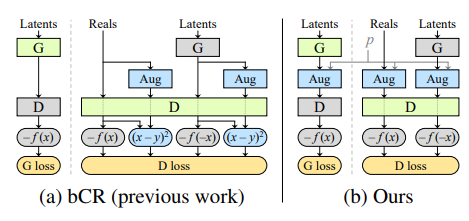

2.2 Designing augmentations that do not leak

Bora et al.에 따르면, 데이터에 corruption을 만들 때 그 데이터의 확률분포에 invertible transformation을 사용하여 corruption을 만들었다면, Training 과정에서 내부적으로 이러한 corruption을 실행취소시켜서 다시 올바른 distribution을 찾도록 만든다는 것을 알아내었다. 이렇게 invertible한 transformation을 사용하여 augmentation하는 것을 Non-leaking augmentation이라고 부르고, Invertible tranformation은 augmented된 data만을 사용한 것인지 판별이 가능하도록해준다. 

예시로.... input 이미지의 90%를 0로 만드는 변환을 한다고 하자. 이 방법은 확률 분포 관점에서 invertible한 transformation이다. 왜냐하면, 남겨진 10% 부분의 이미지를 통해 원래 이미지를 추론할 수 있기 때문이다.

반면에, {0도, 90도, 180도, 270도}에서 무작위로 골라서 회전시키는 방법으로 변형시킨 이미지의 경우, 원본 이미지에서 어떻게 회전시켰는지 분별하지 못하기 때문에 invertible하지 못한 이미지가 된다.

많은 stochastic augmentation들이 특정 조건에서 non-leaking하게 설계할 수 있고, 이에 따라 deterministic mapping, noise 추가, transformation, projection 같은 다양한 augmentation도 non-leaking하게 모두 적용시킬 수 있다.  


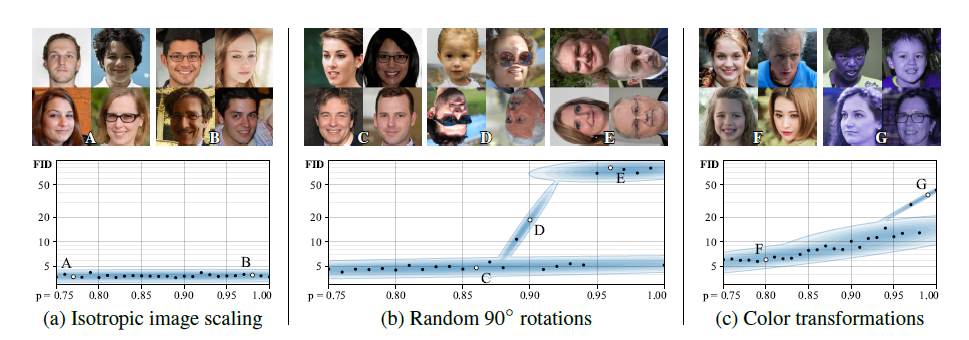

위의 이미지는 실제 적용을 통해 확인해본 예제이다. (a)는 Isotropic Image Scaling을 한 경우이고, 모든 'augmentation이 실행될 확률 p'에 대해서 leaking이 발생하지 않은 것을 볼 수 있다. 

하지만, (b)와 같이 rotation을 한 경우, p가 높을 때 Generator가 얼굴을 어떤 방향으로 생성해야하는지 알지 못했다. 그래도 p가 0.85보다 낮을 경우, Generator가 생성해낸 모든 이미지들이 제대로 된 방향으로 생성된 것을 확인하였다. (c)와 같은 color augmentation의 경우 p=0.8까지는 제대로된 결과가 나왔다.   

2.3 Our augmentation pipeline

6가지의 카테고리로 구성된 18가지의 transformation의 pipeline을 구성하였다

6가지 카테고리
1. Pixel blitting: x축 대칭, 90도 회전, integer translation 
2. More General geometric transfromations
3. color transforms
4. image-space filtering
5. additive noise
6. cutout

또한, Generator의 training에서도 augmentation이 가능하도록 하였고, standard differentiable primitives를 사용하여 이를 구현하였다.

Augmentation의 강도는 0 ~ 1 사이의 p를 조절하여 제어하였고, 각각의 augmentation과 minibatch 내의 이미지에서 randomization이 되도록하였다. 

stochastic discriminator augmentation의 성능을 아래의 그림을 통해 각각의 augmentation 카테고리와 data 크기 그리고 p에 대하여 나타내었다.

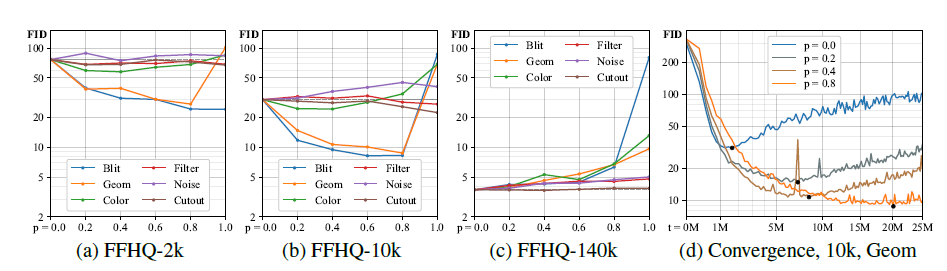

많은 경우에서 성능 향상을 보였다. 하지만, 여전히 dataset의 양에 의존하는 결과를 나타내었고, 몇몇의 augmentation은 좋지 못한 결과를 나타내었다. 

2K dataset에서 pixel blitting과 geometric transforms에서 가장 좋은 성능 향상을 보였고, Color transforms는 조금의 성능 향상을 보였다. 하지만, noise, image-space filtering, cutout에서는 좋지 못한 성능을 보였다. 데이터 양에 따라서도 결과가 달리나타난 점도 있었고, 높은 p에서는 leaking이 발생하기도 하였다.

결과적으로 pixel blitting과 geometric transforms, color transforms만을 augmentation 방법으로 선정하여 나머지 테스트를 수행하였다. (d)는 강력한 augmentation에서 overfitting이 감소하는 것을 보여주는 그림이다. 


**3.Adaptive discriminator augmentation**

Augmentation의 세기를 overfitting의 정도에 따라 조절될 수 있도록 하려고 하였다. overfitting의 정도를 수치화하는 방법은 validation set을 따로 떼내어 training set에서의 결과와 비교하는 것이다. 아래의 이미지를 보면 (b)와 (c)에서 Overgitting되면 validation set(초록색)이 generated된 이미지(주황색)처럼 행동하는 것을 볼 수 있다. 

진짜 이미지와 generated된 이미지에 대한 discriminator의 output:D(x)가 0인 지점에 대해 대칭적으로 발산하는 것을 볼 수 있다. 이러한 발산은 따로 떼어낸 validation set 없이도 수치화 할 수 있다.



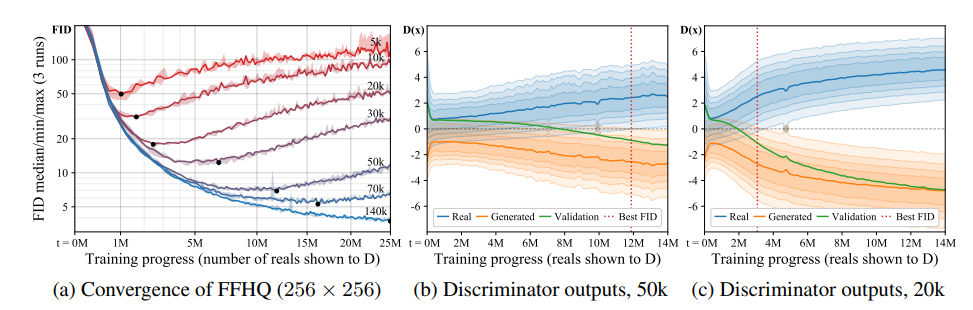

Dscriminator의 training set, validation set, generated image에 대한 각가의 output을 $D_{train}$, $D_{validation}$, $D_{generated}$ 이라고 하고, 이 값들의 N개의 연속된 미니배치에 대한 평균값을 E[ ]로 표현한다고 하자. 실제 논문에서는 N=4를 사용하였고, 이는 4x64=256 개의 이미지에 대해서 실핸한 것을 의미한다. 

위에서 정의한 것을 바탕으로 위의 그림을 2개의 overfitting heuristics으로 표현하였다. 

$r_v$= $\frac{E[ D_{train} ] - E[ D_{validation} ]}{E[ D_{train} ] - E[ D_{generated} ]}$,   $\quad\quad\quad$  $r_t$=$E[ sign(D_{train})]$   

$r_v$와 $r_t$ 모두 0일 때는 overfitting이 없는 것이고, r=1일 때는 완벽하게 overfitting이 발생하는 것을 의미한다. 이 연구의 목표는 augmentation probability p를 조절해서 선택한 heuristic이 적절한 target value에 매칭되도록 하는 것이다.

첫번째 heuristic인 $r_v$는 training set과 generated 이미지에 대한 validation set의 output을 의미한다. 이것은 분리된 validation set가 있음을 의미한다.

두번째 heuristic인 $r_t$는 training set 중에서 positive discriminator output을 내는 부분을 의미한다. 이 값이 target value와 hyperparameter에 덜 민감하다는 것을 찾아내었다.

Augmentation 세기 p를 제어하는 방법은 다음과 같다. 처음에 p를 0으로 세팅하고, 매 4번의 미니배치마다 한번씩 선택한 overfitting heuristic에 대해 조정하도록 하였다. 만약에 heuristic이 overfitting이 너무 크거나 작다고 표현한다면, p를 고정된 수치만큼 증가시키거나 감소시켜서 조절한다. 이러한 조절 방식을 Adaptive discriminaotr augmentation(ADA)라고 부른다.





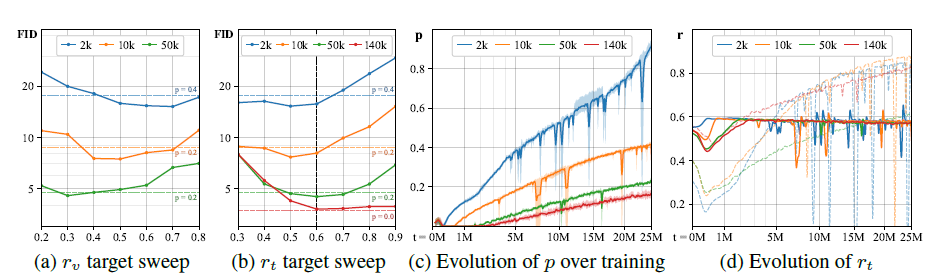

위의 그림 (a)와 (b)에서는 각각의 heuristic을 사용했을 때 target value이 quality에 미치는 영향을 나타낸 그림이다. $r_v$와 $r_t$ 모두 overfitting을 막아주는 것을 확인하였고, 가장 적합한 p값을 찾았다. 

$r_t$는 target value를 0.6으로 잡고 사용하였다. (c)는 시간에 대한 p값의 변화를 나타낸 그래프이다. 2000개의 training set의 경우 몇몇의 augmentation이 leaking되어 별로 효과를 보지 못했다. p=0.5 이후에는 FID 값이 확실히 안좋아졌다. (d)는 $r_t$값 변화를 나타낸 것으로 고정된 p값은 처음에는 강력했다가 점점 약해지는 경향을 보였다.



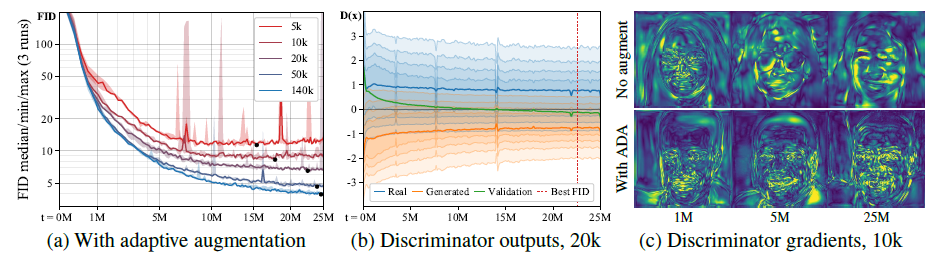

위의 그림은 ADA를 적용하여 처음의 그림과 같은 세팅에 대해 성능을 측정한 그림이다. 기존의 결과 그림과 비교해서 training set의 크기와 상관없이 잘 수렴하였고, overfitting도 더 이상 발생하지 않은 것을 볼 수 있다. Augmentation를 적용하지 않은 경우, Generator가 discriminator로부터 받은 gradient 값이 모든 시간에서 굉장히 simple한 것을 볼 수 있다. ADA를 사용한 경우, gradient가 더 detail하였고, 이러한 점이 성능 악화를 막아주었다. 또한 loss function이 더 강건하졌다.

**4.Evlauation**

4.1 Training from scratch

아래 그림은 FFHQ와 LSUN CAT dataset의 결과를 dataset의 크기에 따라서 나타낸 것이다. ADA가 적은 dataset에서도 FID를 낮춰주는 것을 확인할 수 있다.
또한, dataset이 부족할 경우 bCR의 성능이 어떤지 보았는데, bCR은 data 수가 부족한 정도가 적을 경우 효과적이었지만 generated 이미지의 leaking은 막을 수 없었다. 반면에, ADA의 augmentation의 경우 leaking이 없었다.

ADA와 bCR를 합쳐서 적용해보았다. ADA를 먼저 input되는 이미지(진짜와 가짜 둘 다)에 적용시키고, 그 후에 bCR을 적용시켰다. 그 결과, 성능이 향상되었다.

또한, PA-GAN, WGAN-GP, zCR과 같은 다른 방법들과도 비교해보았는데, ADA가 훨씬 좋은 성능을 보이는 것을 확인할 수 있었다. 

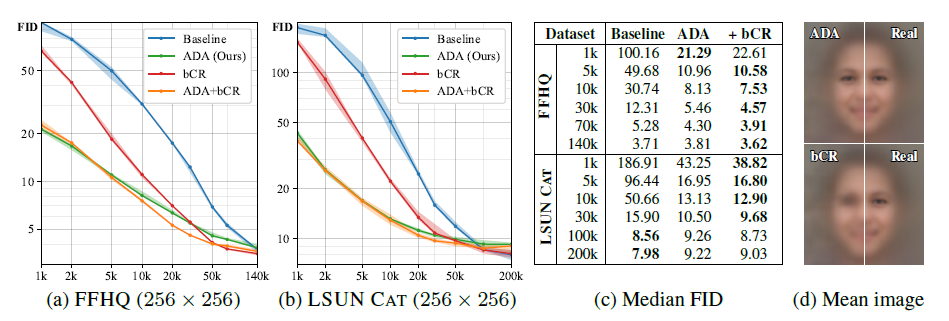

4.2 Transfer Learning

Transfer Learning은 random initialization과는 다르게 이미 학습한 모델의 결과를 사용함으로서 필요한 training data 수를 감소시킬 수 있는 방법이다. 많은 선행 연구에서 transfer하는 동안 discriminator의 고해상도 layer부분을 freezing해놓는 Freeze-D 방법이 좋은 성능을 내는 것을 보여주었다.

아래 그림은 몇몇의 transfer learning 기법을 적용한 결과이다. Transfer Learning이 scratch-training 보다 훨씬 나은 결과를 보여주는 것을 확인하였고, 다양한 source가 포함된 dataset을 사용할 경우 효과가 좋았다. 예를 들면, 사람 얼굴만 있는 FFHQ dataset으로 transfer learning하는 것보다, 더 다양한 data source가 있는 LSUN DOG로 transfer learning할 경우 FID가 적은걸 볼 수 있다.
또한, ADA와 같이 Freeze-D를 적용할 경우 성능이 더 향상되는 것을 확인할 수 있었다.

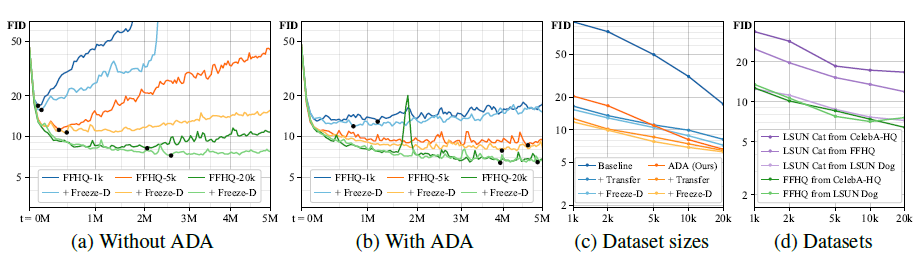

4.3 Small datasets

매우 적은 양의 dataset에 대해서 이 모델을 적용하였다. 아래 그림은 적은 dataset으로 생성한 이미지들이다.

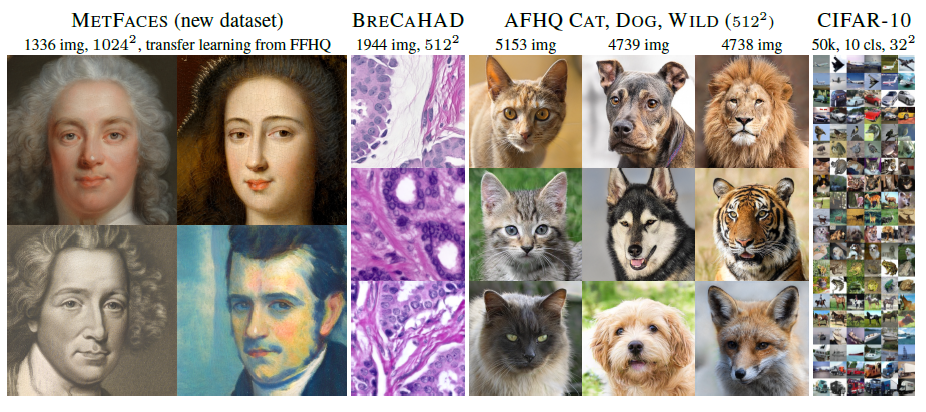

FID가 적은 dataset에서는 좋은 평가 지표가 되지 못한 점을 찾아내었다. 대신에 Kernel Inception Distance(KID)라는 새로운 지표를 찾아내어 적용하였다. 

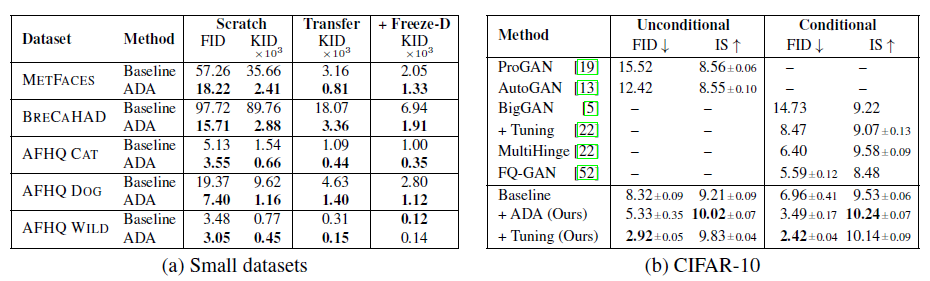

5.Conclusions

ADA 방법이 적은 training data에서 효과적인 것을 확인하였다. 

**StyleGAN2 + ADA로 이미지 생성 및 projection/style mixing 해보기**

references: https://github.com/NVlabs/stylegan2-ada-pytorch

In [1]:
# 먼저 런타임 유형을 GPU로 바꿔준다.

!nvidia-smi # GPU 확인하기

Mon Nov 22 11:17:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# 내 구글드라이브랑 연결하기. 
# 나오는 URL을 눌러서 사용 권한 받아오기

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 현재 디렉토리에 NVLabs에서 pytorch버전으로 만들어놓은 StyleGAN2-ADA 모델(코드)를 갖고 온다.

%cd "/content/"
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!mkdir datasets
!mkdir ds 

/content
Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 1.12 MiB | 3.79 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [4]:
!pip install ninja opensimplex torch==1.7.1 torchvision==0.8.2

     |████████████████████████████████| 108 kB 4.3 MB/s 
     |████████████████████████████████| 776.8 MB 18 kB/s 
     |████████████████████████████████| 12.8 MB 25 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.1 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.7.1 which is incompatible.


In [5]:
# Dataset 구글 드라이브에 업로드하기
# FFHQ 데이터셋 중에서 1000개의 이미지만 다운로드 받아 256x256으로 변환후 zip으로 압축하여 구글 드라이브에 업로드해주었다.

import zipfile
DatasetPath = "/content/drive/MyDrive/Datasets/ffhq256.zip"
fileName=DatasetPath
with zipfile.ZipFile(fileName, 'r') as zip:
  zip.printdir()
  zip.extractall('/content/datasets/')  # datasets 디렉토리에 이미지 데이터 압축풀기

File Name                                             Modified             Size
00000.png                                      2021-11-21 15:44:16       104527
00001.png                                      2021-11-21 15:44:16       109958
00002.png                                      2021-11-21 15:44:16        91341
00003.png                                      2021-11-21 15:44:16       101213
00004.png                                      2021-11-21 15:44:16       121505
00005.png                                      2021-11-21 15:44:16        98305
00006.png                                      2021-11-21 15:44:16       106188
00007.png                                      2021-11-21 15:44:16       109795
00008.png                                      2021-11-21 15:44:16       104650
00009.png                                      2021-11-21 15:44:16        86510
00010.png                                      2021-11-21 15:44:16       111057
00011.png                               

In [6]:
# NVlabs에서 만든 모델은 Dataset을 StyleGAN2-ADA PyTorch 모델에서 사용할 수 있는 형태의 dataset으로 변환해줘야한다.

dataset_path="/content/datasets"
%cd /content/stylegan2-ada-pytorch

#변환 코드  원본은 --source에 path 넣고, ouput은 --dest에 path를 넣는다.
!python dataset_tool.py --source /content/datasets --dest /content/ds

/content/stylegan2-ada-pytorch
100% 1000/1000 [00:08<00:00, 120.90it/s]


In [7]:
# NVlabs의 train에 세팅값 어떤게 있는지 살펴보기
#!python train.py --help

In [8]:
# train하기 
# transfer learning
# pre-trained data의 parameter가 저장되어 있는 .pkl data
# 최초에는 ffhq256의 parameter를 사용하였다.
# 나중에 pre-trained된 pkl data가 생기면 그 path를 넣어서 사용한다.
#--outdir는 결과 저장할 path (필수) --data는 학습할 data의 path (필수)
%cd /content/stylegan2-ada-pytorch

!python train.py --outdir=/content/drive/MyDrive/outputs/  --data=/content/ds/00000 --gpus=1 --cfg=paper256 --metrics=None --resume=ffhq256 --snap=1 --augpipe=bg --mirror=True --aug=ada --target=0.7

/content/stylegan2-ada-pytorch

Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 1,
  "network_snapshot_ticks": 1,
  "metrics": [],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "/content/ds/00000",
    "use_labels": false,
    "max_size": 1000,
    "xflip": true,
    "resolution": 256
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 8
    },
    "synthesis_kwargs": {
      "channel_base": 16384,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 8
    },
    "channel_base": 16384,
    "channel_max": 51

In [11]:
# 학습한 data의 parameter를 이용해서 Generator로 이미지 생성하기
# train 과정에서 생성된 snapshot pkl 파일을 network에 넣어준다.

!python generate.py --outdir=/content/drive/MyDrive/outputs/ --trunc=1 --seeds=0 --network=/content/drive/MyDrive/outputs/00001-00000-mirror-paper256-ada-target0.7-bg-resumeffhq256/network-snapshot-000012.pkl

Loading networks from "/content/drive/MyDrive/outputs/00001-00000-mirror-paper256-ada-target0.7-bg-resumeffhq256/network-snapshot-000012.pkl"...
Generating image for seed 0 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


(256, 256, 3)


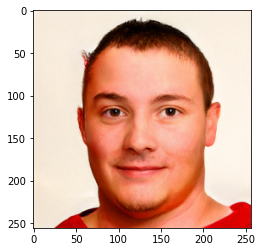

In [12]:
# output에 생성된 이미지 보기

import cv2
import matplotlib.pyplot as plt

img=plt.imread('/content/drive/MyDrive/outputs/seed0000.png')
print(img.shape)
plt.imshow(img)


1000장의 적은양의 data로도 이미지를 생성할 수 있다!

In [13]:
# Latent Space에 Project해보기

!python projector.py --network=/content/drive/MyDrive/outputs/00001-00000-mirror-paper256-ada-target0.7-bg-resumeffhq256/network-snapshot-000012.pkl --outdir=/content/drive/MyDrive/outputs/ --target=/content/ds/00000/img00000017.png

Loading networks from "/content/drive/MyDrive/outputs/00001-00000-mirror-paper256-ada-target0.7-bg-resumeffhq256/network-snapshot-000012.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
step    1/1000: dist 0.66 loss 24567.33
step    2/1000: dist 0.66 loss 27640.69
step    3/1000: dist 0.76 loss 27167.19
step    4/1000: dist 0.66 loss 26250.18
step    5/1000: dist 0.61 loss 24955.51
step    6/1000: dist 0.69 loss 23354.48
step    7/1000: dist 0.60 loss 21509.69
step    8/1000: dist 0.66 loss 19483.47
step    9/1000: dist 0.64 loss 17341.23
step   10/1000: dist 0.57 loss 15141.97
step   11/1000: dist 0.60 loss 12945.01
step   12/1000: dist 0.64 loss 10814.60
step   13/1000: dist 0.59 loss 8802.03
step   14/1000: dist 0.58 loss 6947.20
step   15/1000: dist 0.55 loss 5312.00
step   16/1000: dist 0.58 loss 3969.17
step   17/1000: dist 0.56 loss 2942.34
step   18/1000: di

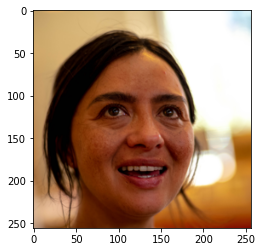

In [17]:
# 원본 이미지
org_img=plt.imread('/content/drive/MyDrive/outputs/target.png')
plt.imshow(org_img)

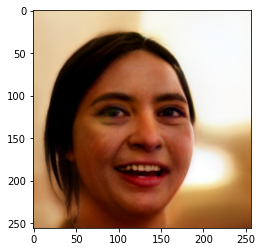

In [20]:
# projected 이미지
prj_img=plt.imread('/content/drive/MyDrive/outputs/proj.png')
plt.imshow(prj_img)

# output에서 동영상으로 확인해 볼 수 있다.

In [27]:
# StyleMixing

# 여러 이미지의 style을 섞을 수도 있다.
!python style_mixing.py --outdir=/content/drive/MyDrive/outputs/ --rows=85,100,75,458,1500 --cols=55,821,1789,293 --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl


Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"...
Generating W vectors...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Generating images...
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating style-mixed images...
Saving images...
Saving image grid...


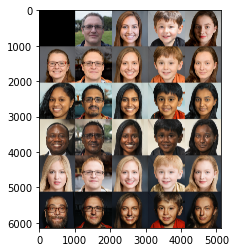

In [28]:
# Style Mixing으로 다양한 이미지의 스타일을 mixing할 수 있다.

stmix_img=plt.imread('/content/drive/MyDrive/outputs/grid.png')
plt.imshow(stmix_img)